### Missing data
[Link to recording 1](https://ithogskolan.sharepoint.com/:v:/s/AI23/Efj7su9CrMhAnMlZdqduwOMBT8sC3U8Z0NGNYZ6ie8tDnA?e=rEiQIr)  
[Link to recording 2](https://ithogskolan.sharepoint.com/:v:/s/AI23/Ef2vWSoU_HpCnilgtSb1OwwBudkAs2UkxSOta75_P_u4FQ?e=cFR6aa)  
- Missing data occurs when missing values are simply absent or contain NaN (not a number) for any feature (column) i a dataset. This will cause issues with many ML algorithms.
- **Missing data can impact:**
    - Data visualization
    - Arithmetic computations
    - ML Algorithms
- **Common methods to deal with missing data:**
    - **dropna**
    - Remove rows or columns cointaining missing data
    - **fillna**
    - Impute with mean or median
    - impute with mode (most frequently occuring feature)
    - impute with forward or backward fill
    - Interpolate data between two points

- *Note: Domian knowledge is often needed to decide how to fill nulls.*
- Ett objekt har attribut och properties medans en tabell har rader och kolumner.
- En tabell kan beskriva en klass kan man se det som. Där varje kolumn har ett värde och motsvaras av ett objekts attribut/property. Det kommer mer om detta i databashanteringskursen.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings(category=FutureWarning, action="ignore")

In [3]:
df = pd.DataFrame(np.random.randn(10,4), columns=["A","B","C","D"])
df = df[df >0]
df

,A,B,C,D
0,NaN,0.744240,NaN,NaN
1,1.865592,0.043442,NaN,0.211215
2,0.938848,0.261757,NaN,0.017543
3,0.612272,NaN,1.435999,0.538574
4,NaN,2.193152,1.040839,NaN
5,NaN,0.743255,NaN,0.749260
6,NaN,NaN,0.335131,0.827996
7,0.055945,NaN,NaN,NaN
8,0.731612,2.112363,0.647661,NaN
9,NaN,0.490000,NaN,NaN


- Ta bort en kolmn med dåliga värden, typ

In [4]:
copy = df.copy()
copy.drop(columns="C", inplace=True)
copy


,A,B,D
0,NaN,0.744240,NaN
1,1.865592,0.043442,0.211215
2,0.938848,0.261757,0.017543
3,0.612272,NaN,0.538574
4,NaN,2.193152,NaN
5,NaN,0.743255,0.749260
6,NaN,NaN,0.827996
7,0.055945,NaN,NaN
8,0.731612,2.112363,NaN
9,NaN,0.490000,NaN


## dropna
- Remove rows (default), or columns containing null.
- om man vill ändra till columner, använd **'axis = "columns"'**  
  
**Parameters:**
- **how** "any" (default), or "all"
- **thresh** = set number of non missing values a row must contain in order to not drop
- **subset** = only look for NaN in subset of columns (or rows)

In [5]:
copy.isna() # returnerar en lika stor DF med True där det saknas värden

,A,B,D
0,True,False,True
1,False,False,False
2,False,False,False
3,False,True,False
4,True,False,True
5,True,False,False
6,True,True,False
7,False,True,True
8,False,False,True
9,True,False,True


In [18]:
copy
#copy.dropna() # tar bort alla rader som innehåller ett eller flera NaN
#copy.dropna(how='all') # tar bort rader där alla värden är NaN
#copy.dropna(thresh=2) # tröskelvärde för hur många NaN man kan acceptera innan man tar bort raden.
#copy.dropna(subset="A") # Tar bort alla rader, där kolumn "A" saknar värden
#copy.dropna(subset=["A","D"]) #denna accepterar också en lista som input
#copy.dropna(axis="columns", subset = 4) # tar bort alla kolumner där det är NaN i rad 2


,B
0,0.744240
1,0.043442
2,0.261757
3,NaN
4,2.193152
5,0.743255
6,NaN
7,NaN
8,2.112363
9,0.490000


### fillna
##### Föreläsning 2:
- **dropna** är för att ta bort missing values
- **fillna** är för att fylla i missing values

In [19]:
copy = df.copy()
copy.fillna("-") # byter ut NaN till det man anger

,A,B,C,D
0,-,0.74424,-,-
1,1.865592,0.043442,-,0.211215
2,0.938848,0.261757,-,0.017543
3,0.612272,-,1.435999,0.538574
4,-,2.193152,1.040839,-
5,-,0.743255,-,0.74926
6,-,-,0.335131,0.827996
7,0.055945,-,-,-
8,0.731612,2.112363,0.647661,-
9,-,0.49,-,-


In [21]:
copy = df.copy()
print(copy)
copy["A"].fillna(copy["A"].median(), inplace=True) # i kolumn "A" sätts alla NaN till median av de värden som finns i "A"
#copy["B"].mode() #mode returnerar alltid en lista, används mest på "categorical values", tex om man vill fill med man eller kvinna, beroende på vilken som är vanligast
#copy["A"].ffill(inplace=True) # forward fill
#copy["B"].bfill(inplace=True) #backward fill
#copy["D"].interpolate(inplace=True)
#copy
print()
print(copy)

          A         B         C         D
0       NaN  0.744240       NaN       NaN
1  1.865592  0.043442       NaN  0.211215
2  0.938848  0.261757       NaN  0.017543
3  0.612272       NaN  1.435999  0.538574
4       NaN  2.193152  1.040839       NaN
5       NaN  0.743255       NaN  0.749260
6       NaN       NaN  0.335131  0.827996
7  0.055945       NaN       NaN       NaN
8  0.731612  2.112363  0.647661       NaN
9       NaN  0.490000       NaN       NaN

          A         B         C         D
0  0.731612  0.744240       NaN       NaN
1  1.865592  0.043442       NaN  0.211215
2  0.938848  0.261757       NaN  0.017543
3  0.612272       NaN  1.435999  0.538574
4  0.731612  2.193152  1.040839       NaN
5  0.731612  0.743255       NaN  0.749260
6  0.731612       NaN  0.335131  0.827996
7  0.055945       NaN       NaN       NaN
8  0.731612  2.112363  0.647661       NaN
9  0.731612  0.490000       NaN       NaN


Kolla i videon hur man gör nedan:

          A         B         C         D
0       NaN  1.339503  0.141942  0.721566
1       NaN       NaN       NaN  1.163838
2  1.546304       NaN  0.631939       NaN
3       NaN       NaN       NaN  0.378882
4  1.364003  1.446789       NaN       NaN
5       NaN  1.674574       NaN  1.144681
6       NaN       NaN       NaN  0.420906
7  0.875583       NaN       NaN  0.570339
8  0.415609  0.513508       NaN  1.935000
9  0.006971  0.287994       NaN       NaN

          A         B         C         D
0       NaN  1.339503  0.141942  0.721566
1       NaN  1.366325  0.386941  1.163838
2  1.546304  1.393146  0.631939  0.771360
3  1.455154  1.419968  0.631939  0.378882
4  1.364003  1.446789  0.631939  0.761781
5  1.201196  1.674574  0.631939  1.144681
6  1.038390  1.287552  0.631939  0.420906
7  0.875583  0.900530  0.631939  0.570339
8  0.415609  0.513508  0.631939  1.935000
9  0.006971  0.287994  0.631939  1.935000


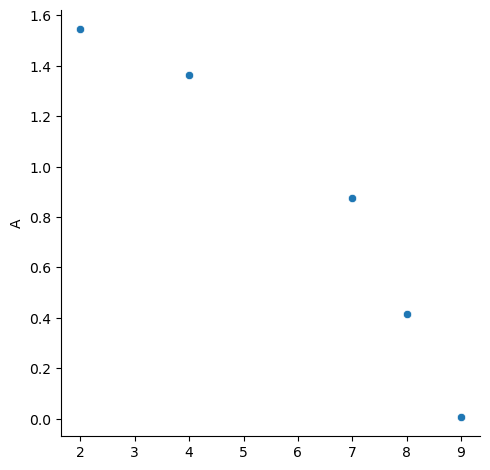

In [59]:
copy = df.copy()
print(copy)
sns.relplot(x=copy.index, y=copy["A"], data=copy)
print()
copy.interpolate(inplace=True)
print(copy)

I ovan så saknas det värden i början, det kan man åtgärda med att göra en backwards fill efter man gjort en interpolate

In [55]:
copy.bfill(inplace=True)
print(copy)

          A         B         C         D
0  1.546304  1.339503  0.141942  0.721566
1  1.546304  1.366325  0.386941  1.163838
2  1.546304  1.393146  0.631939  0.771360
3  1.455154  1.419968  0.631939  0.378882
4  1.364003  1.446789  0.631939  0.761781
5  1.201196  1.674574  0.631939  1.144681
6  1.038390  1.287552  0.631939  0.420906
7  0.875583  0.900530  0.631939  0.570339
8  0.415609  0.513508  0.631939  1.935000
9  0.006971  0.287994  0.631939  1.935000
